## 0. Load All Data in From CSV Documents

In [77]:
# package imports for clustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from ImageIOFunctions import LoadImageFromCSV
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

Training data is retrieved and stored from 6 csv documents, where each CSV document contains the data for an image on different channels (RGB) of the satellite image. These are then grouped to produce the x and y raw data.

In [78]:
filenames = ['1000_1000.csv','1000_2000.csv','1000_3000.csv','1000_4000.csv','1000_5000.csv','1000_6000.csv']

In [79]:
# image data red retrieval from csv
reddatafnames = [os.path.join(os.getcwd(),'data','red'+x) for x in filenames]
reddatalist = [LoadImageFromCSV(fname) for fname in reddatafnames]

# stack data vertically to produce raw image data array
redimage_structured = np.vstack(tuple(reddatalist))
raw_imagered = redimage_structured.flatten()

In [80]:
# image data blue retrieval from csv
bluedatafnames = [os.path.join(os.getcwd(),'data','blue'+x) for x in filenames]
bluedatalist = [LoadImageFromCSV(fname) for fname in bluedatafnames]

# stack data vertically to produce raw image data array
blueimage_structured = np.vstack(tuple(bluedatalist))
raw_imageblue = blueimage_structured.flatten()

In [81]:
# image data green retrieval from csv
greendatafnames = [os.path.join(os.getcwd(),'data','green'+x) for x in filenames]
greendatalist = [LoadImageFromCSV(fname) for fname in greendatafnames]

# stack data vertically to produce raw image data array
greenimage_structured = np.vstack(tuple(greendatalist))
raw_imagegreen = greenimage_structured.flatten()

In [82]:
# image data blue retrieval from csv
nirdatafnames = [os.path.join(os.getcwd(),'data','nir'+x) for x in filenames]
nirdatalist = [LoadImageFromCSV(fname) for fname in nirdatafnames]

# stack data vertically to produce raw image data array
nirimage_structured = np.vstack(tuple(nirdatalist))
raw_imagenir = nirimage_structured.flatten()

In [83]:
# label data retrieval from csv
labeldatafnames = [os.path.join(os.getcwd(),'data','label'+x) for x in filenames]
labeldatalist = [LoadImageFromCSV(fname) for fname in labeldatafnames]

# stack data vertically to produce raw label data array
labels_structured = np.vstack(tuple(labeldatalist))
raw_labels = labels_structured.flatten()

Quick sanity check using imshow to make sure that nothing funky happened with training data or label data

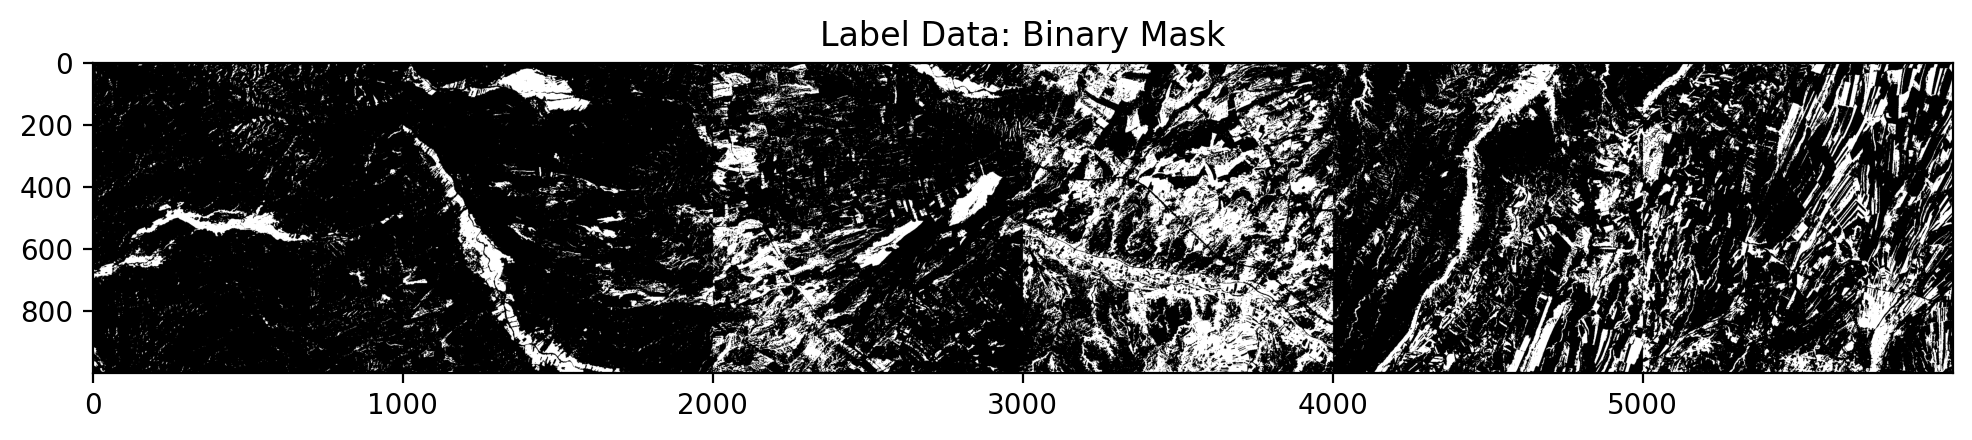

In [84]:
plt.imshow(labels_structured.T, cmap='gray')
plt.title('Label Data: Binary Mask')
plt.show()

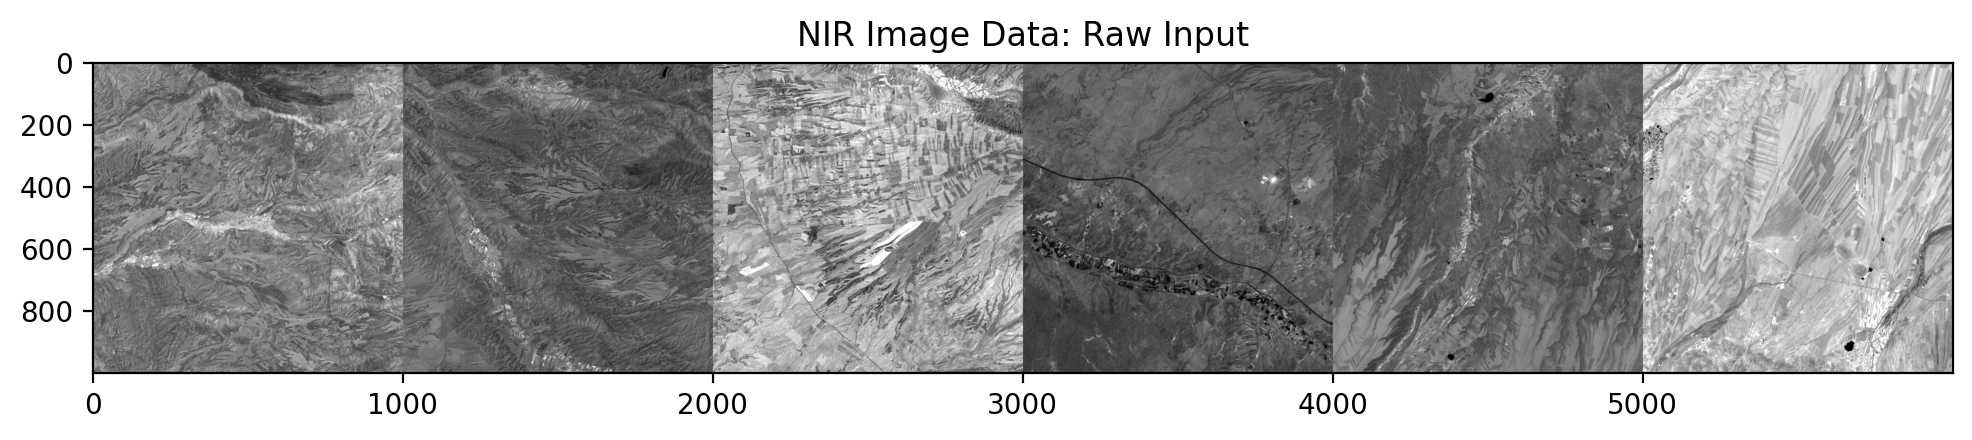

In [85]:
plt.imshow(nirimage_structured.T, cmap='gray')
plt.title('NIR Image Data: Raw Input')
plt.show()

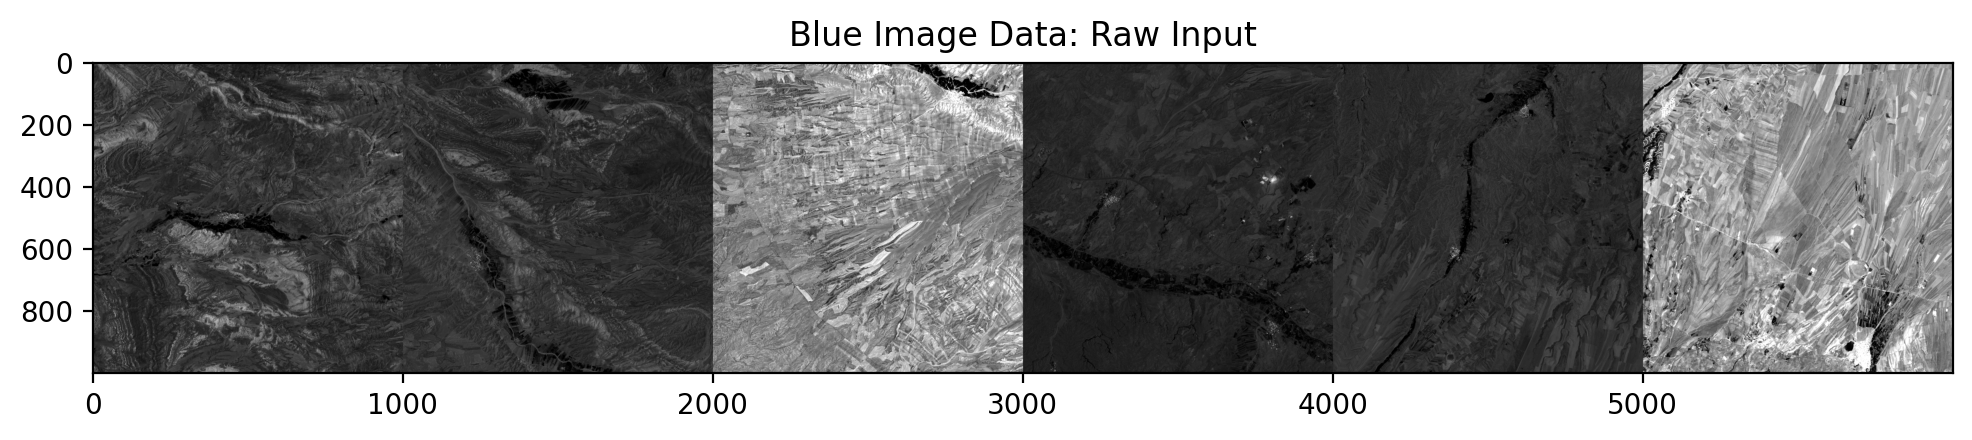

In [86]:
plt.imshow(blueimage_structured.T, cmap='gray')
plt.title('Blue Image Data: Raw Input')
plt.show()

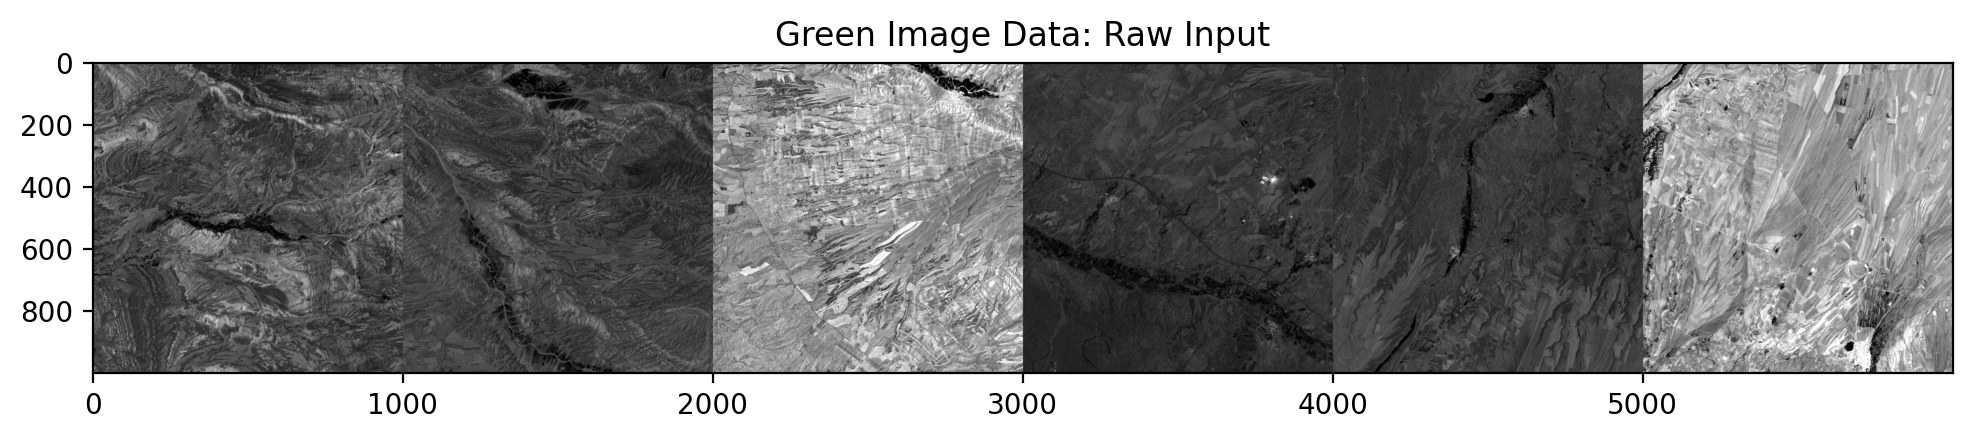

In [87]:
plt.imshow(greenimage_structured.T, cmap='gray')
plt.title('Green Image Data: Raw Input')
plt.show()

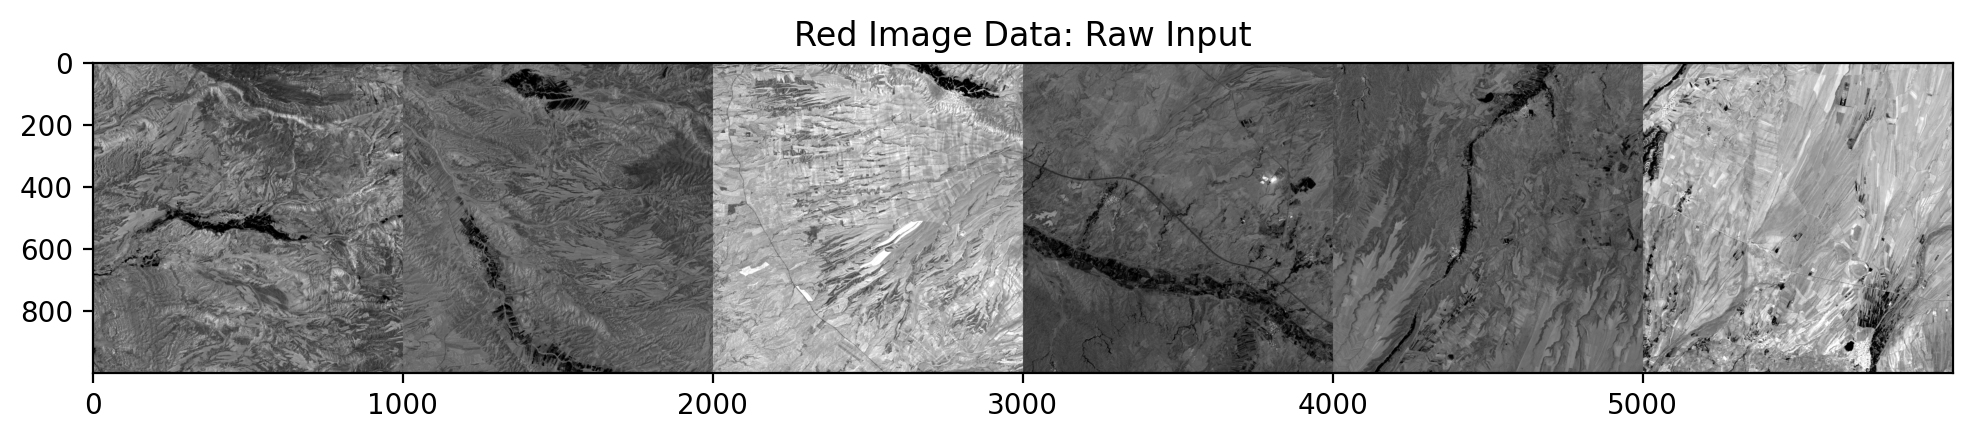

In [88]:
plt.imshow(redimage_structured.T, cmap='gray')
plt.title('Red Image Data: Raw Input')
plt.show()

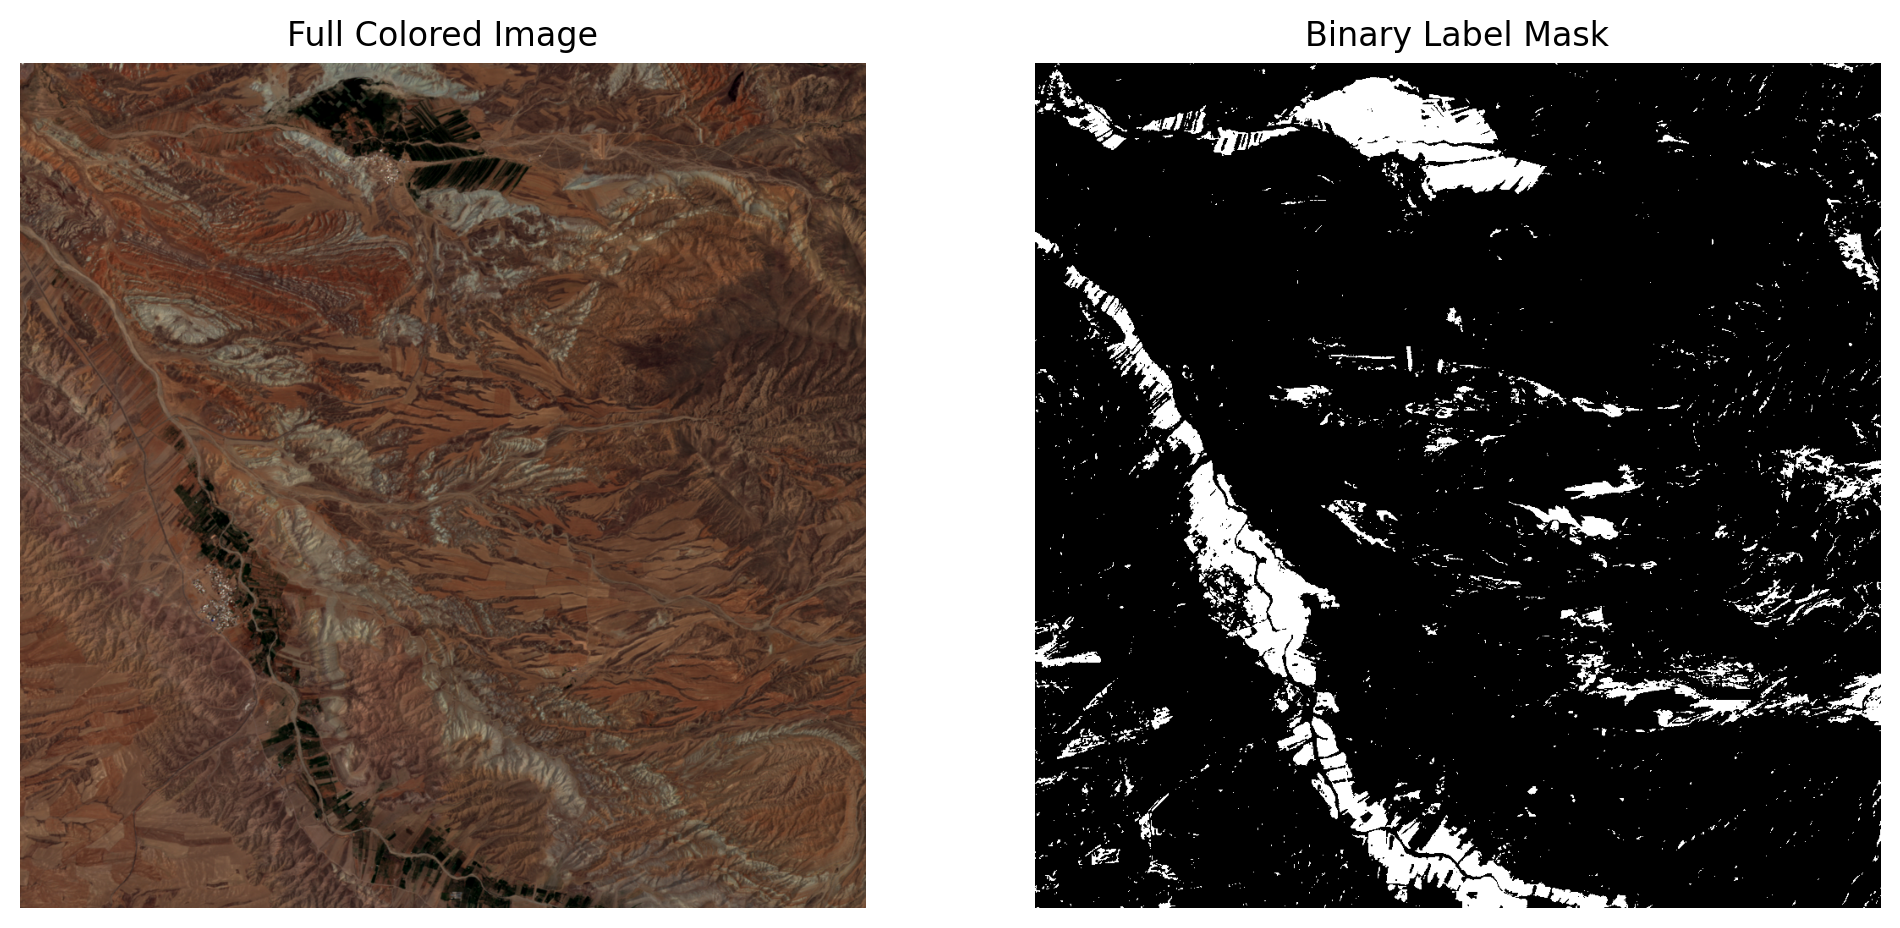

<Figure size 2400x1600 with 0 Axes>

In [89]:
# stack on new axis to form colored image
colored_image = np.stack((redimage_structured.T,greenimage_structured.T,blueimage_structured.T),axis=2)

# two frame subplot
fig, ax = plt.subplots(1, 2, frameon=False)

ax[0].imshow(colored_image[:,1000:2000,:])
ax[0].set_title('Full Colored Image')
ax[0].axis("off")

ax[1].imshow(labels_structured.T[:,1000:2000], cmap='gray')
ax[1].set_title('Binary Label Mask')
ax[1].axis("off")

plt.show()
plt.savefig('demoimagewithlabel.png', transparent=True)

Next, the csv data must be collapsed and converted to record data, with shape (n_samples, n_features), with the label data structured as (n_samples).

In [90]:
# import train test split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# collapse and collect input channels and store as record array
raw_image = np.vstack((raw_imagered,raw_imagegreen,raw_imageblue,raw_imagenir)).T
raw_image = StandardScaler().fit_transform(raw_image)
# perform train test split
image_train, image_test, label_train, label_test = train_test_split(raw_image, raw_labels, test_size=0.2)

## 0.1 Data Exploration

In [91]:
# remap images to 0-255
image_exp = (image_train - np.amin(image_train)) / (np.amax(image_train) - np.amin(image_train))

# explore distribution of values between positive and negative classes
average_pixels = np.empty((4,2))
average_pixels[0,:] = (np.mean(image_exp[label_train == 1,0]), np.mean(image_exp[label_train == 0,0]))
average_pixels[1,:] = (np.mean(image_exp[label_train == 1,1]), np.mean(image_exp[label_train == 0,1]))
average_pixels[2,:] = (np.mean(image_exp[label_train == 1,2]), np.mean(image_exp[label_train == 0,2]))
average_pixels[3,:] = (np.mean(image_exp[label_train == 1,3]), np.mean(image_exp[label_train == 0,3]))

# print averages across different channels
print(average_pixels)

[[0.39812735 0.47698808]
 [0.40154389 0.47612536]
 [0.407011   0.47476375]
 [0.49168187 0.45375192]]


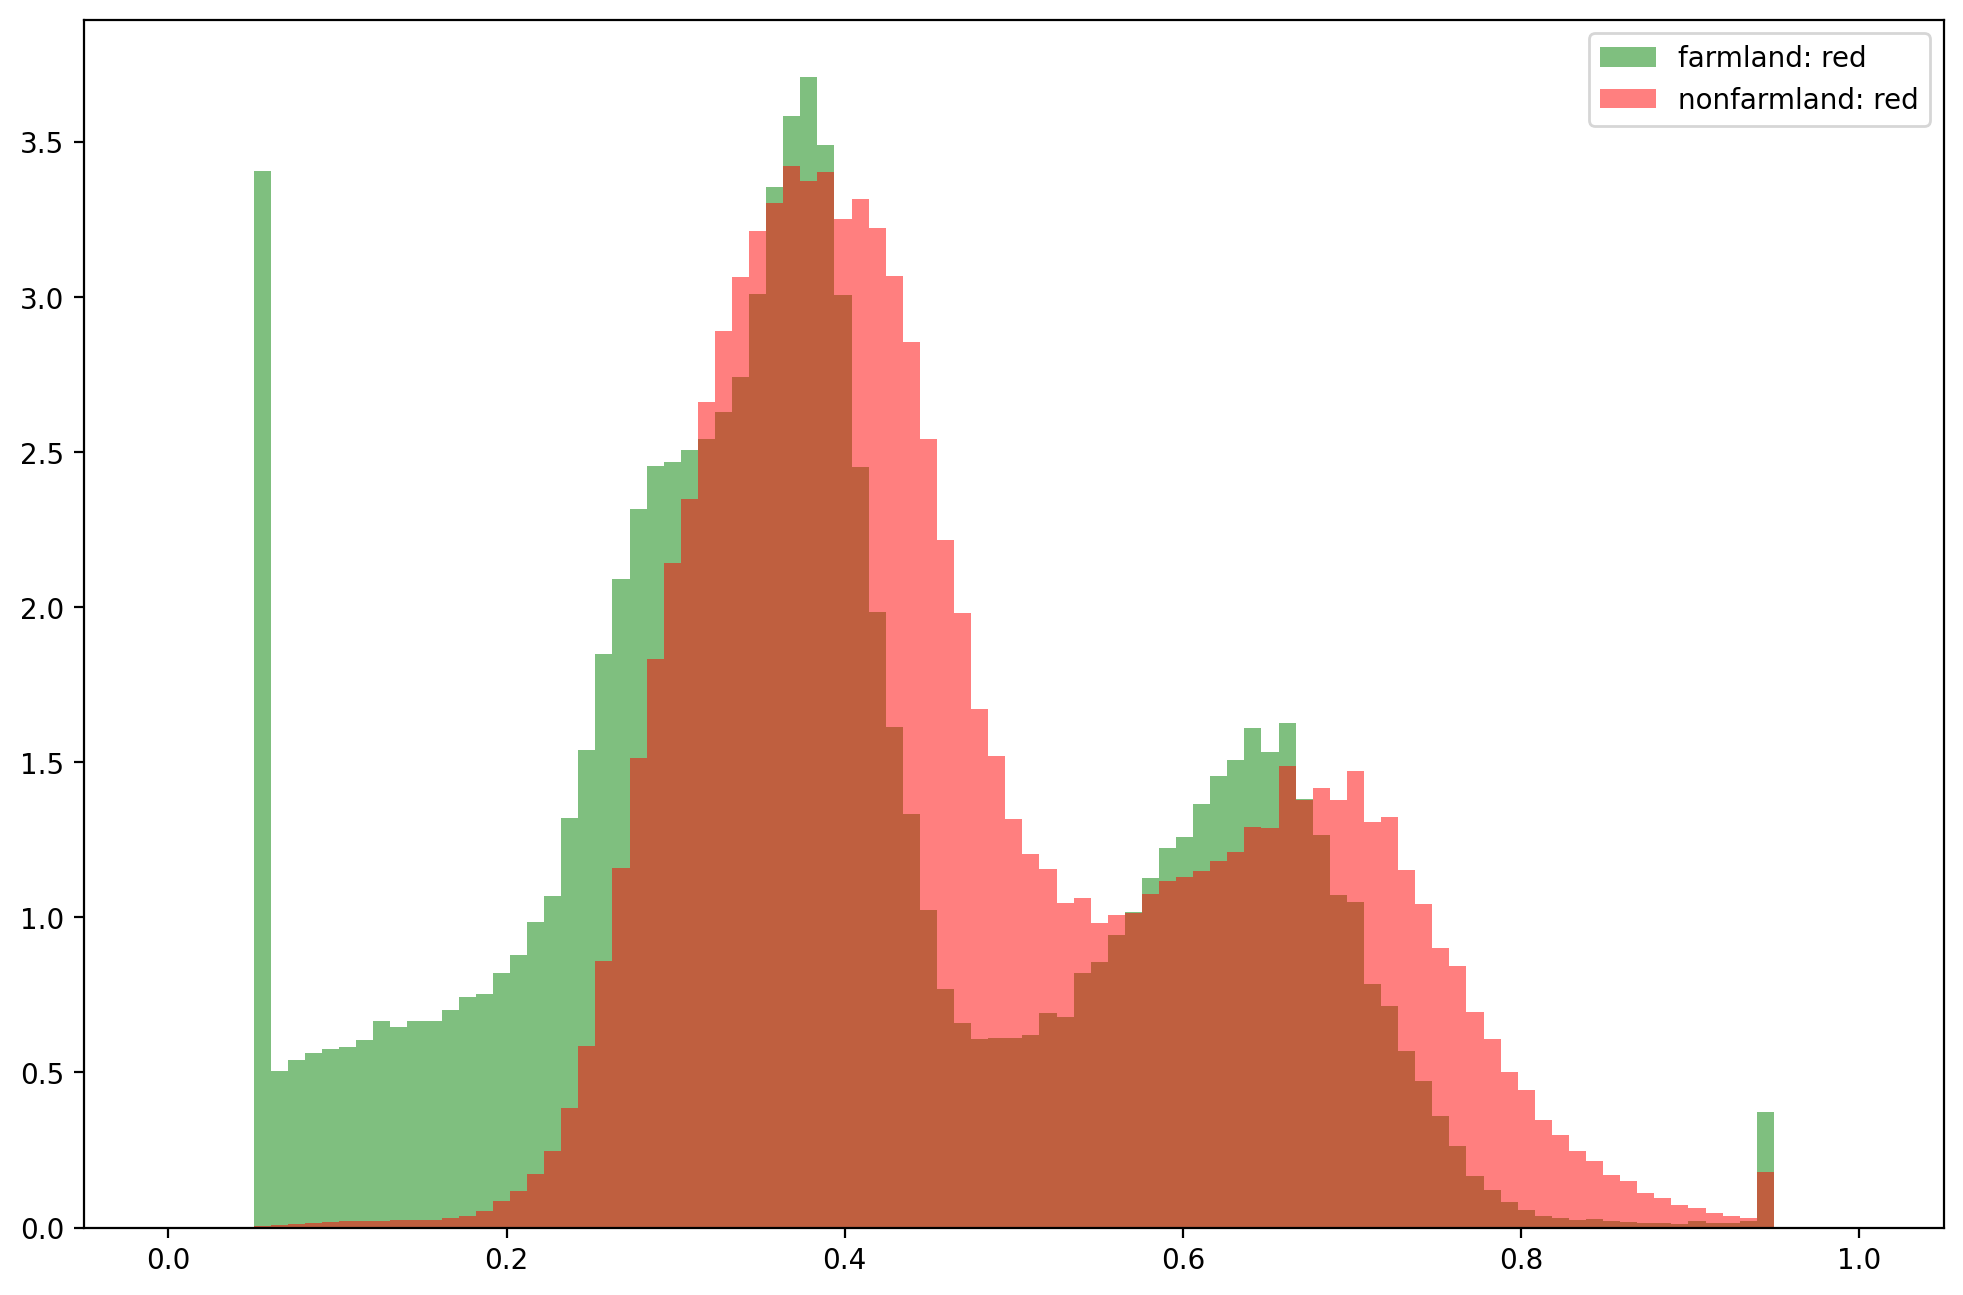

In [92]:
# plot histogram
bins = np.linspace(0, 1, 100)

plt.hist(image_exp[label_train == 1,0], bins, color='g', alpha=0.5, label='farmland: red', density=True)
plt.hist(image_exp[label_train == 0,0], bins, color='r', alpha=0.5, label='nonfarmland: red', density=True)
plt.legend(loc='upper right')
plt.show()

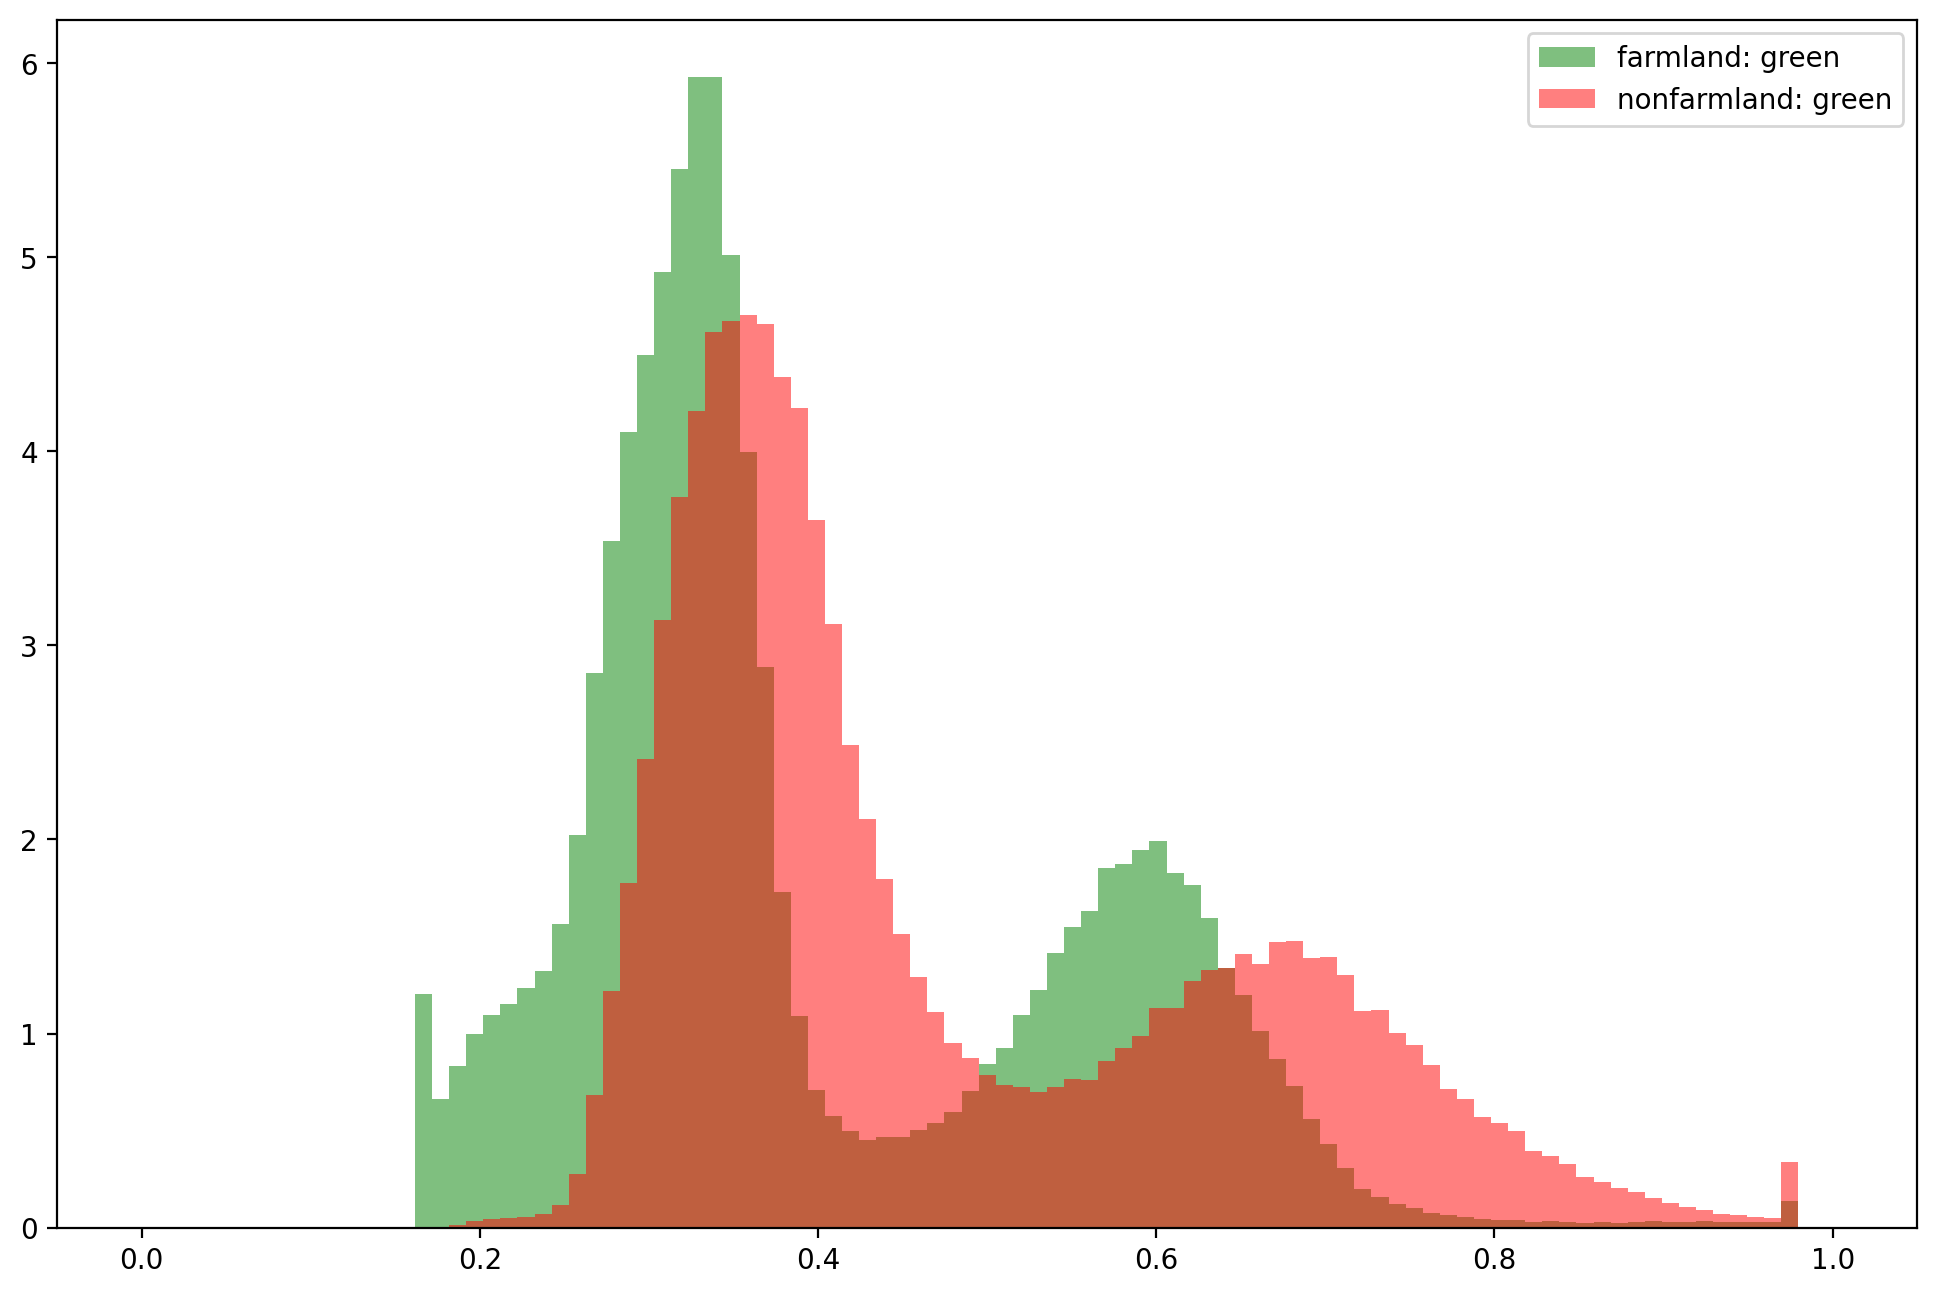

In [93]:
# plot histogram
bins = np.linspace(0, 1, 100)

plt.hist(image_exp[label_train == 1,1], bins, color='g', alpha=0.5, label='farmland: green', density=True)
plt.hist(image_exp[label_train == 0,1], bins, color='r', alpha=0.5, label='nonfarmland: green', density=True)
plt.legend(loc='upper right')
plt.show()

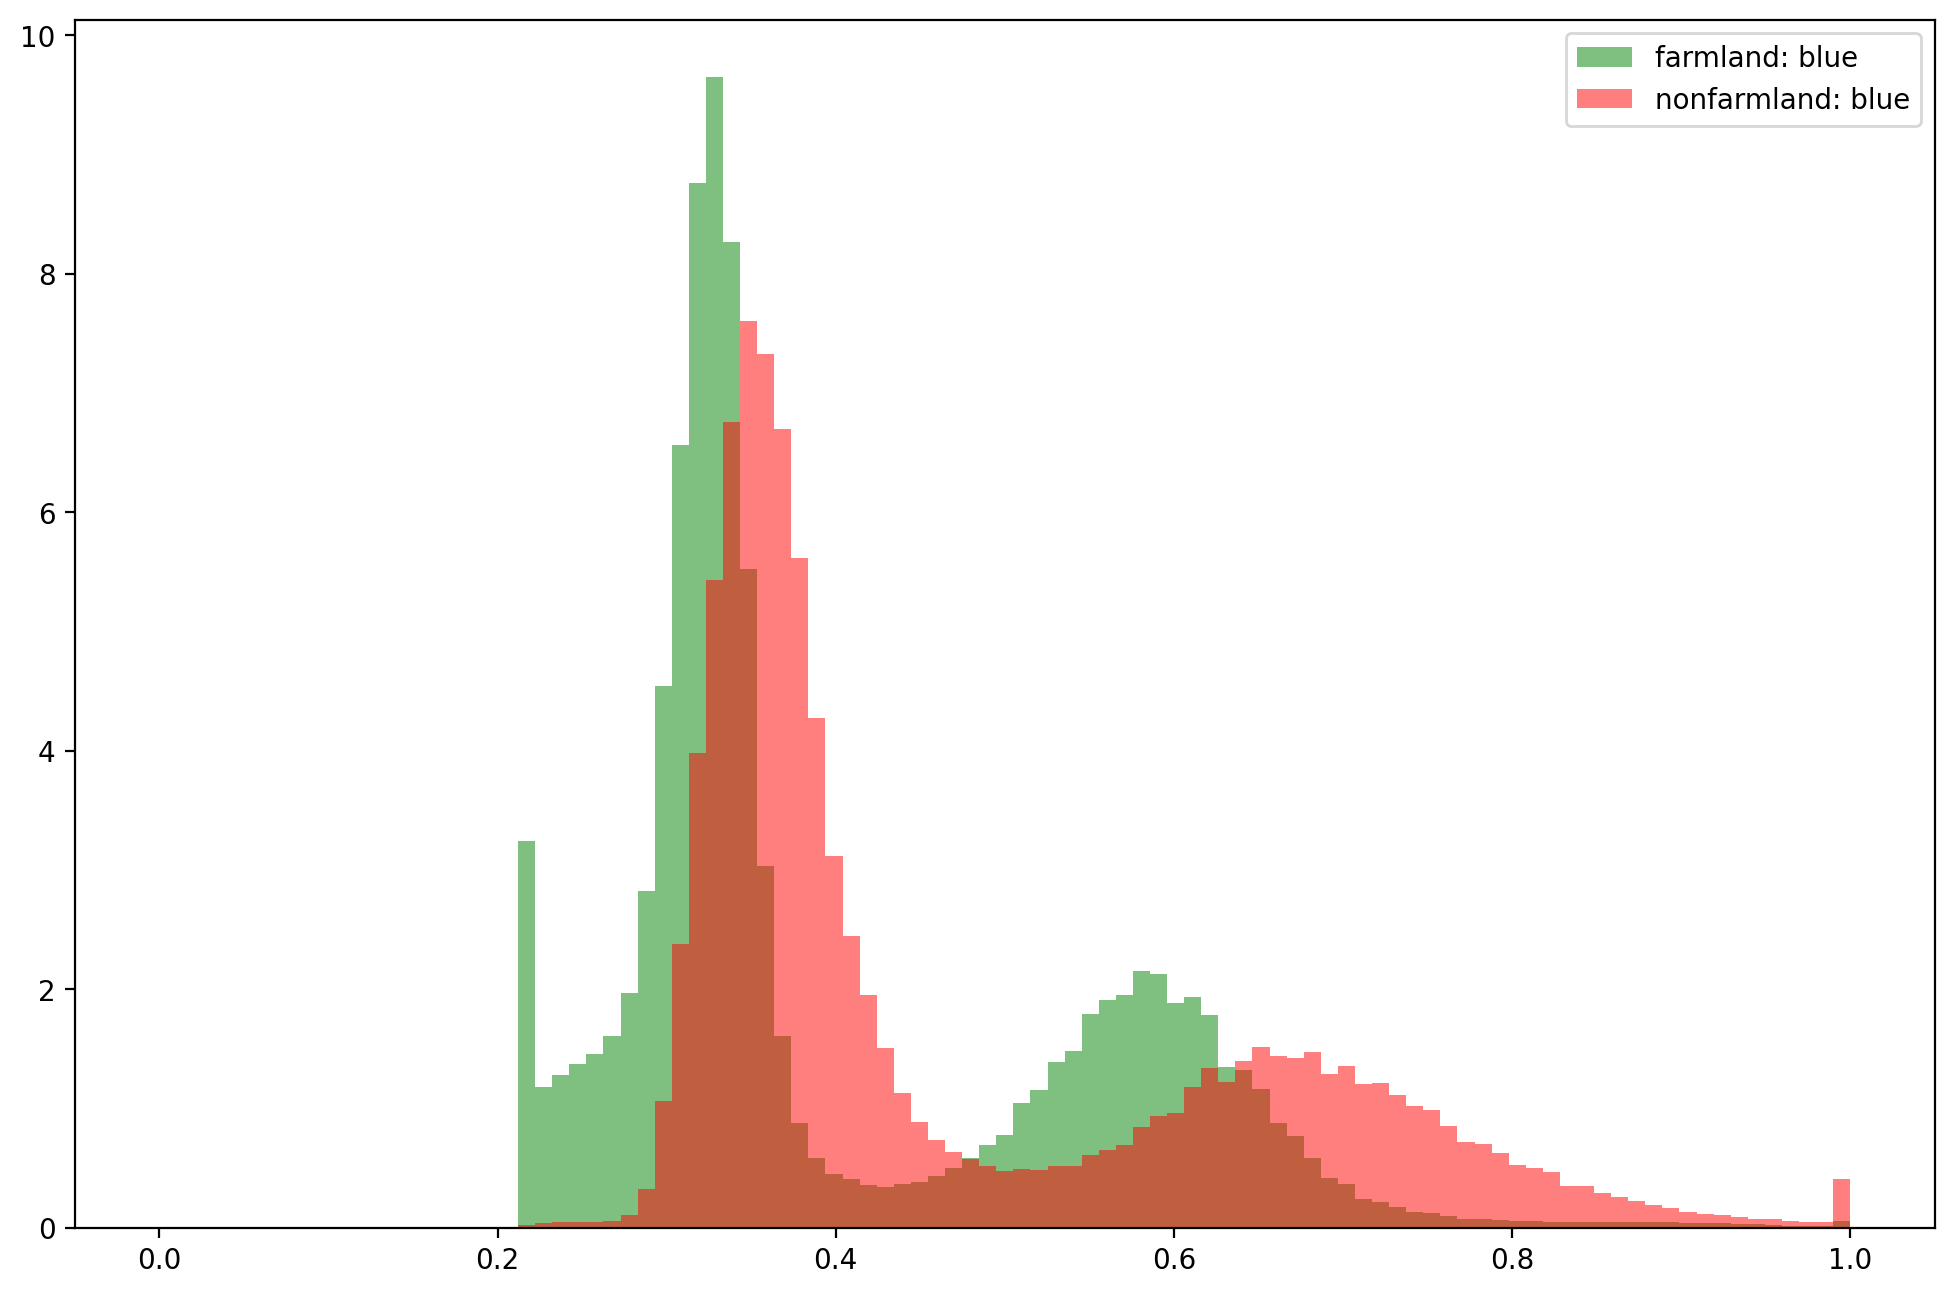

In [94]:
# plot histogram
bins = np.linspace(0, 1, 100)

plt.hist(image_exp[label_train == 1,2], bins, color='g', alpha=0.5, label='farmland: blue', density=True)
plt.hist(image_exp[label_train == 0,2], bins, color='r', alpha=0.5, label='nonfarmland: blue', density=True)
plt.legend(loc='upper right')
plt.show()

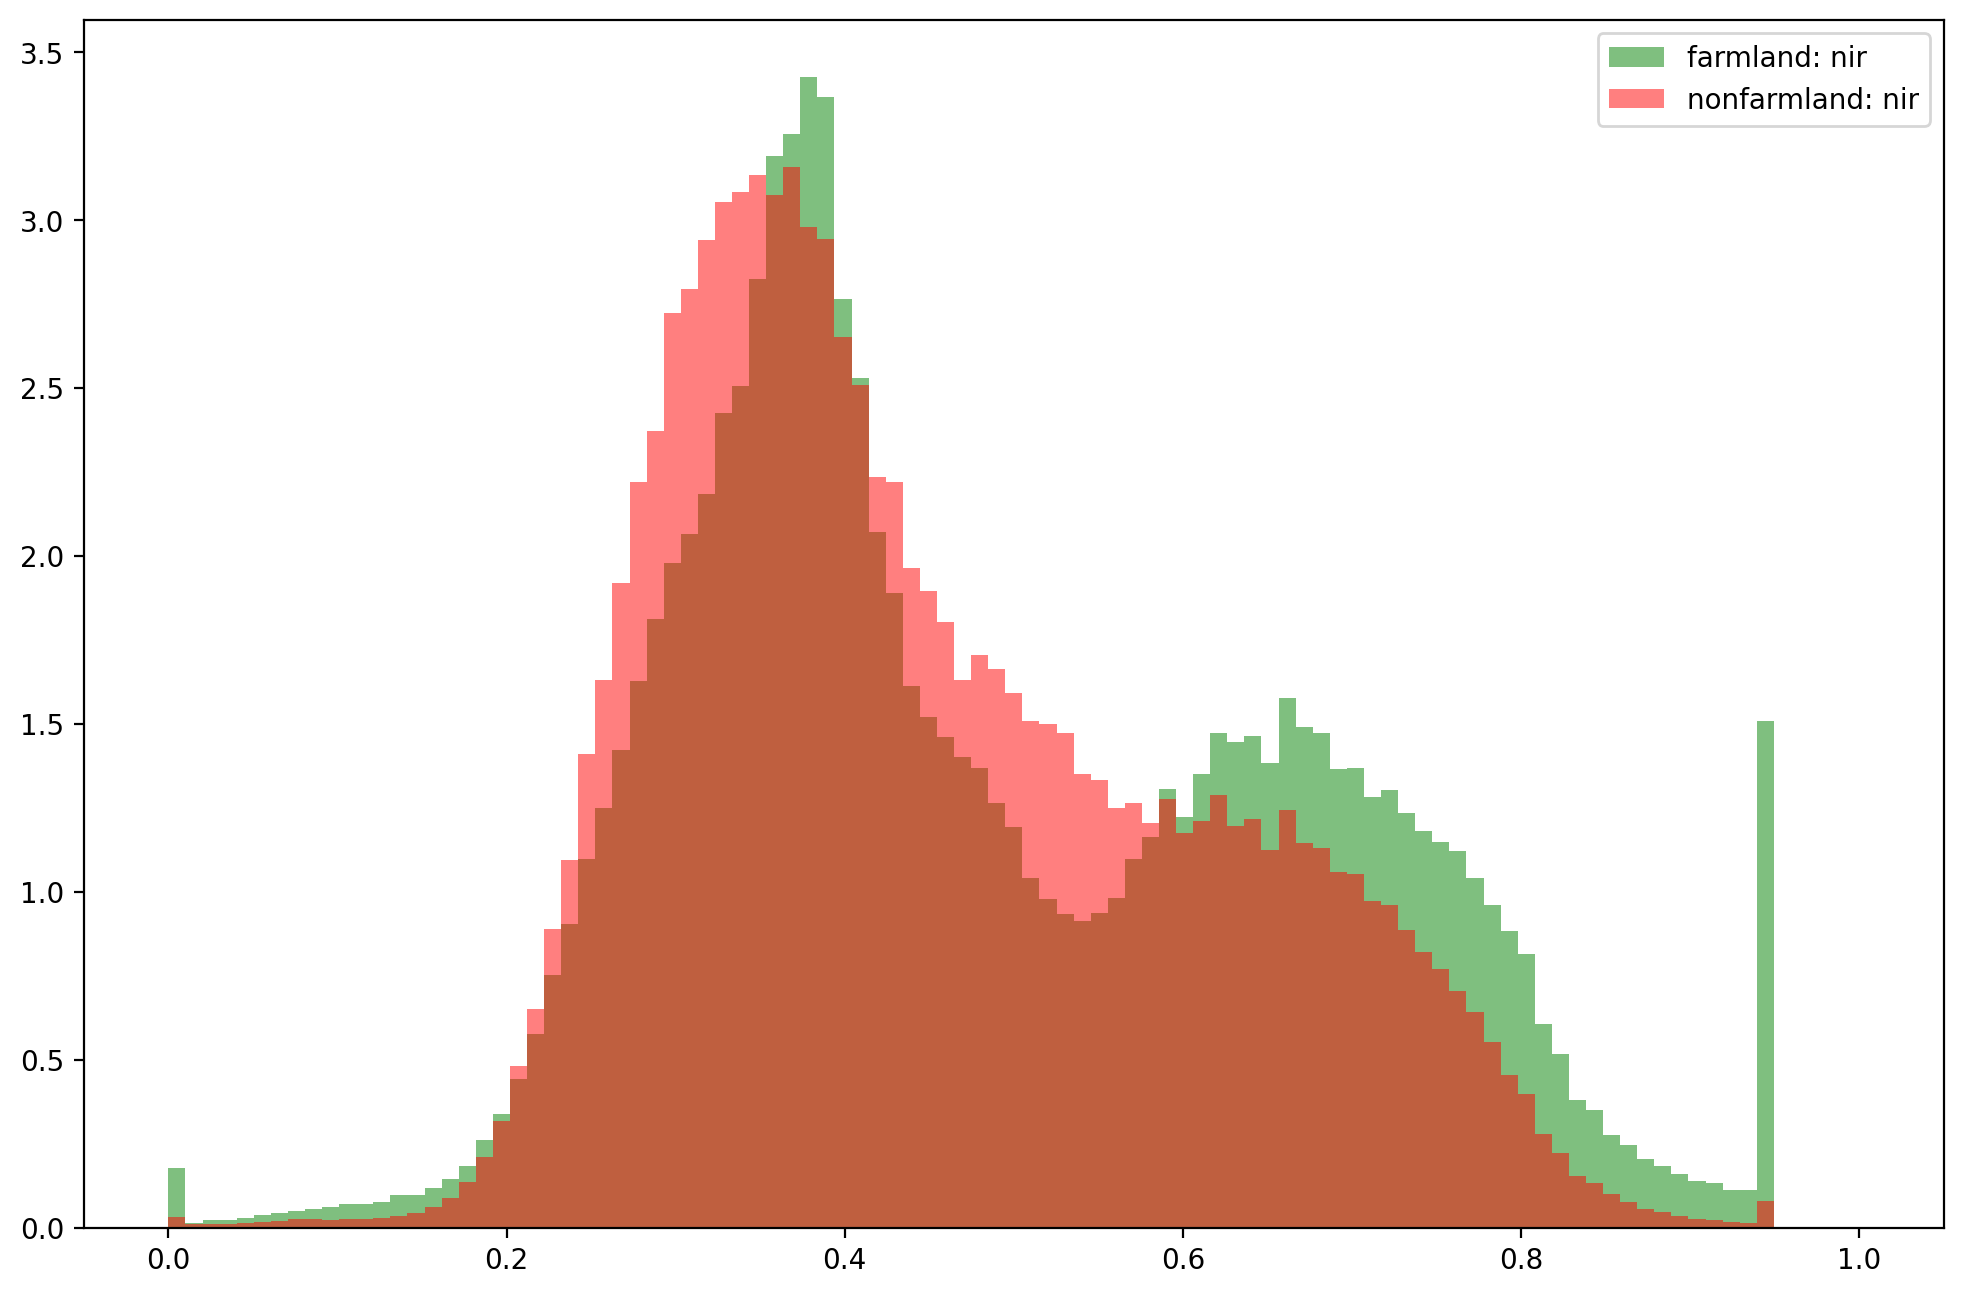

In [95]:
# plot histogram
bins = np.linspace(0, 1, 100)

plt.hist(image_exp[label_train == 1,3], bins, color='g', alpha=0.5, label='farmland: nir', density=True)
plt.hist(image_exp[label_train == 0,3], bins, color='r', alpha=0.5, label='nonfarmland: nir', density=True)
plt.legend(loc='upper right')
plt.show()

## 1. Implement Clustering Algorithms

In [96]:
# clustering imports
from sklearn.cluster import MeanShift, MiniBatchKMeans, KMeans

The k-means algorithm will first be implemented, where the characteristics of each pixel in a channel is used to cluster pixels into two clusters (farmland and nonfarmland)

In [97]:
# generate and fit K-means object on image data
km_cluster = KMeans(n_clusters=2, random_state=5).fit(raw_image)
# store predicted cluster values for K-means
km_predicted = 1 - km_cluster.predict(raw_image)

A more robust K-means algorithm will also be used to attempt to cluster image data into two clusters of similar characteristics.

In [98]:
# generate and fit K-means object on image data
mbkm_cluster = MiniBatchKMeans(n_clusters=2, random_state=5).fit(raw_image)
# store predicted cluster values for K-means
mbkm_predicted = 1 - mbkm_cluster.predict(raw_image)

The birch algorithm will also be used for clustering, using a cluster merging procedure.

In [99]:
###
#    OUR DATASET IS TOO BIG, SO THIS DOESN'T WORK
###

# generate and fit K-means object on image data
# spec_cluster = MeanShift().fit(raw_image)
# store predicted cluster values for K-means
# spec_predicted = spec_cluster.predict(raw_image)

## 2. Implement Supervised Algorithms

In [100]:
# model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
# package imports for clustering and modeling performance
from sklearn.metrics import accuracy_score, f1_score

In [101]:
# make accuracy dictionary
model_accuracy = {}

First, use decision tree classifier to categorize data.

In [102]:
# generate and fit decision tree classifier
dt = DecisionTreeClassifier(random_state=5).fit(image_train, label_train)
# store decision tree prediction values for validation
dt_predicted = dt.predict(image_test)
dt_accuracy = accuracy_score(label_test,dt_predicted)
dt_f1 = f1_score(label_test,dt_predicted)

Next, a multilayer perceptron network.

In [103]:
# generate and fit decision tree classifier
mlp = MLPClassifier(max_iter=2,random_state=5).fit(image_train, label_train)
# store decision tree prediction values for validation
mlp_predicted = mlp.predict(image_test)
mlp_accuracy = accuracy_score(label_test,mlp_predicted)
mlp_f1 = f1_score(label_test,mlp_predicted)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


Next, Bernoulli Naive Bayes model.

In [104]:
# generate and fit decision tree classifier
bnb = BernoulliNB().fit(image_train, label_train)
# store decision tree prediction values for validation
bnb_predicted = bnb.predict(image_test)
bnb_accuracy = accuracy_score(label_test,bnb_predicted)
bnb_f1 = f1_score(label_test,bnb_predicted)

Next, Gaussian Naive Bayes model.

In [105]:
# generate and fit decision tree classifier
gnb = GaussianNB().fit(image_train, label_train)
# store decision tree prediction values for validation
gnb_predicted = gnb.predict(image_test)
gnb_accuracy = accuracy_score(label_test,gnb_predicted)
gnb_f1 = f1_score(label_test,gnb_predicted)

Stochastic Gradient Descent Classifier

In [106]:
# generate and fit decision tree classifier
sgdc = SGDClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
sgdc_predicted = sgdc.predict(image_test)
sgdc_accuracy = accuracy_score(label_test,sgdc_predicted)
sgdc_f1 = f1_score(label_test,sgdc_predicted)

Ridge classifier

In [107]:
# generate and fit decision tree classifier
ridgec = RidgeClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
ridgec_predicted = ridgec.predict(image_test)
ridgec_accuracy = accuracy_score(label_test,ridgec_predicted)
ridgec_f1 = f1_score(label_test,ridgec_predicted)

Random forest classifier

In [117]:
# generate and fit decision tree classifier
rfc = RandomForestClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
rfc_predicted = rfc.predict(image_test)
rfc_accuracy = accuracy_score(label_test,rfc_predicted)
rfc_f1 = f1_score(label_test,rfc_predicted)

Adaboost classifier

In [109]:
# generate and fit decision tree classifier
abc = AdaBoostClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
abc_predicted = abc.predict(image_test)
abc_accuracy = accuracy_score(label_test,abc_predicted)
abc_f1 = f1_score(label_test,abc_predicted)

Gradient boosting classifier

In [110]:
# generate and fit decision tree classifier
gbc = GradientBoostingClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
gbc_predicted = gbc.predict(image_test)
gbc_accuracy = accuracy_score(label_test,gbc_predicted)
gbc_f1 = f1_score(label_test,gbc_predicted)

Voting classifier

In [111]:
# generate and fit decision tree classifier
vc = VotingClassifier(estimators=[('dt',dt),('mlp',mlp),('bnb',bnb),('rfc',rfc)], voting='soft').fit(image_train, label_train)
# store decision tree prediction values for validation
vc_predicted = vc.predict(image_test)
vc_accuracy = accuracy_score(label_test,vc_predicted)
vc_f1 = f1_score(label_test,vc_predicted)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


## 3. Assess performance of All Algorithms

In [112]:
# package imports for clustering and modeling performance
from sklearn.metrics import accuracy_score, f1_score

In [113]:
baseline_accuracy = accuracy_score(raw_labels, np.zeros_like(raw_labels))

In [114]:
print('K-means accuracy:\t\t',accuracy_score(raw_labels,km_predicted))
print('Minibatch K-means accuracy:\t',accuracy_score(raw_labels,mbkm_predicted))

K-means accuracy:		 0.5941236666666667
Minibatch K-means accuracy:	 0.5946801666666667


In [118]:
print('Baseline model accuracy:\t',baseline_accuracy)
print('Decision tree accuracy:\t\t',dt_accuracy)
print('Multilayer perceptron accuracy:\t',mlp_accuracy)
print('Bernoulli NB accuracy:\t\t',bnb_accuracy)
print('Gaussian NB accuracy:\t\t',gnb_accuracy)
print('SGD classifier accuracy:\t',sgdc_accuracy)
print('Ridge classifier accuracy:\t',ridgec_accuracy)
print('Random forest accuracy:\t\t',rfc_accuracy)
print('AdaBoost accuracy:\t\t',abc_accuracy)
print('Gradient boost accuracy:\t',gbc_accuracy)
print('Voting classifier accuracy:\t',vc_accuracy)

Baseline model accuracy:	 0.8012536666666666
Decision tree accuracy:		 0.8467691666666667
Multilayer perceptron accuracy:	 0.88126
Bernoulli NB accuracy:		 0.8012108333333333
Gaussian NB accuracy:		 0.8237733333333334
SGD classifier accuracy:	 0.8413025
Ridge classifier accuracy:	 0.8378966666666666
Random forest accuracy:		 0.8904616666666667
AdaBoost accuracy:		 0.8562825
Gradient boost accuracy:	 0.8746425
Voting classifier accuracy:	 0.871415


In [119]:
print('Decision tree f1:\t\t',dt_f1)
print('Multilayer perceptron f1:\t',mlp_f1)
print('Bernoulli NB f1:\t\t',bnb_f1)
print('Gaussian NB f1:\t\t\t',gnb_f1)
print('SGD classifier f1:\t\t',sgdc_f1)
print('Ridge classifier f1:\t\t',ridgec_f1)
print('Random forest f1:\t\t',rfc_f1)
print('AdaBoost f1:\t\t\t',abc_f1)
print('Gradient boost f1:\t\t',gbc_f1)
print('Voting classifier f1:\t\t',vc_f1)

Decision tree f1:		 0.6192100363856256
Multilayer perceptron f1:	 0.6514703076614501
Bernoulli NB f1:		 0.0
Gaussian NB f1:			 0.2743045784918636
SGD classifier f1:		 0.36585049100408584
Ridge classifier f1:		 0.33662535722324144
Random forest f1:		 0.698721504306729
AdaBoost f1:			 0.5333152931307419
Gradient boost f1:		 0.6249018175289685
Voting classifier f1:		 0.5756340654444645
